In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [223]:
n = 1000

In [224]:
# Set delta as in the paper
rho = 10.0
delta0 = 1.0
delta = np.random.normal(100, 10, n)
delta = np.sort(delta)
print(delta)

[  69.03405773   73.32481084   74.33226658   74.34618819   75.05484596
   75.35637854   75.40548978   75.50513898   75.54733697   76.80141976
   76.84646513   77.06391275   77.29032961   77.38290743   77.4910976
   77.53582299   77.74358562   77.90281122   78.06412217   78.2727734
   78.4223821    78.67719764   78.82308328   78.85192553   78.93851084
   79.16667238   79.75344419   79.89201842   80.07819979   80.11464398
   80.21258734   80.61725433   80.72457547   80.77633575   80.80512164
   81.23656953   81.25421096   81.39098184   81.44203239   81.45074337
   81.48309037   81.72148749   81.81646622   81.8785833    82.00680106
   82.01396108   82.10797992   82.25411538   82.31163156   82.34409571
   82.47754356   82.51218869   82.51879411   82.68208627   82.77225847
   82.93557671   83.0929483    83.09711686   83.18311757   83.36115646
   83.36599217   83.42691446   83.43656222   83.66175434   83.68517111
   83.71018071   83.80836628   83.81426864   83.85860024   83.92876221
   83.93

In [225]:
# Set zeta
zeta = np.random.normal(1, 2, n)
print(zeta)

[  3.70565700e+00   1.28973132e-01  -3.48584066e+00  -1.74082508e+00
   4.06696922e+00   3.71121608e+00   3.33333820e+00   4.06236615e-01
   1.95128182e+00   3.06566287e-01  -2.51427697e+00   1.49374185e+00
   2.64315614e+00   8.52765607e-01   4.65761935e+00   1.35774911e+00
   1.52548420e-02   1.56386366e-01   3.23375793e+00   7.18197083e-01
   3.79279332e+00   1.23935612e+00   6.02113861e-01   1.74918843e+00
   1.11085543e+00   2.01807764e+00   1.20751322e+00  -3.60354311e-02
   9.44849126e-01   3.13462702e+00   1.88893928e+00   9.35791769e-01
   4.44145494e+00   2.35858097e+00  -2.20210670e+00   1.90811047e+00
  -5.96445229e-01   8.18147150e-01  -2.82967340e-02   2.55685188e+00
  -2.20305397e-01  -4.99868679e-01  -3.07169807e+00   1.41664833e+00
  -1.63216170e+00  -2.34566190e+00   1.73762783e+00   2.02911969e+00
   1.75441811e-01  -1.52045851e+00   4.77277830e-01  -3.83959150e+00
  -2.90250620e+00   4.04898895e+00   3.05590990e+00  -2.54947565e+00
   1.99188869e+00   5.08686867e-01

In [226]:
def spectral_func(rho, delta, zeta, x):
    return rho + np.sum(zeta ** 2 / (delta - x))

In [227]:
def spectral_func_prime(delta, zeta, x):
    return np.sum(zeta ** 2/(delta - x) ** 2)

In [228]:
def g_spectral_func(rho, delta, zeta, x, k):
    if k == delta.shape[0]:
        k -= 1
    delta_reduced = np.delete(delta, [k, k+1])
    zeta_reduced = np.delete(zeta, [k, k+1])
    return spectral_func(rho, delta_reduced, zeta_reduced, x)

In [229]:
def h_spectral_func(rho, delta, zeta, x, k):
    if k == delta.shape[0]:
        k -= 1
    delta_reduced = delta[k : k+2]
    print(delta_reduced)
    zeta_reduced = zeta[k : k+2]
    return spectral_func(rho, delta_reduced, zeta_reduced, x)

In [230]:
def discriminant_formula_interior(a, b, c):
    if a <= 0:
        return float(a - np.sqrt(a ** 2 - 4 * b * c)) / float (2 * c)
    else:
        return float(2 * b) / float(a + np.sqrt(a ** 2 - 4 * b * c))

In [231]:
def discriminant_formula_exterior(a, b, c):
    if a >= 0:
        return float(a + np.sqrt(a ** 2 - 4 * b * c)) / float (2 * c)
    else:
        return float(2 * b) / float(a - np.sqrt(a ** 2 - 4 * b * c))

In [232]:
def interior_init(rho, delta, zeta, k):
    middle = float(delta[k] + delta[k+1]) / 2.0
    c = g_spectral_func(rho, delta, zeta, middle, k)
    d = delta[k+1] - delta[k]
    if spectral_func(rho, delta, zeta, middle) >= 0:
        a = c * d + zeta[k] ** 2 + zeta[k+1] ** 2
        b = zeta[k] ** 2 * d
        return discriminant_formula_interior(a, b, c) + delta[k]
    else:
        a = - c * d + zeta[k] ** 2 + zeta[k+1] ** 2
        b = - zeta[k + 1] ** 2 * d
        return discriminant_formula_interior(a, b, c) + delta[k + 1]    

In [233]:
def exterior_init(rho, delta, zeta):
    n = delta.shape[0]
    delta_n = delta[n - 1] + np.linalg.norm(zeta) ** 2 / float(rho)
    middle = float(delta[n - 1] + delta_n) / 2.0
    if spectral_func(rho, delta, zeta, middle) <= 0:
        if g_spectral_func(rho, delta, zeta, middle, n - 2) <= - h_spectral_func(rho, delta, zeta, delta_n, n - 2):
            return delta_n
        else:
            d = delta[n - 1] - delta[n - 2]
            c = g_spectral_func(rho, delta, zeta, middle, n - 2)
            a = - c * d +  zeta[n - 2] ** 2 + zeta[n - 1] ** 2
            b = - zeta[n - 1] ** 2 * d
            return discriminant_formula_exterior(a, b, c) + delta_n
    else:
        d = delta[n - 1] - delta[n - 2]
        c = g_spectral_func(rho, delta, zeta, middle, n - 2)
        a = - c * d +  zeta[n - 2] ** 2 + zeta[n - 1] ** 2
        b = - zeta[n - 1] ** 2 * d
        return discriminant_formula_exterior(a, b, c) + delta_n

In [234]:
y = np.zeros((n, ))
for k in range(0, n-1):
    y[k] = interior_init(rho, delta, zeta, k)
y[n - 1] = exterior_init(rho, delta, zeta)

[ 128.64242879  135.37579465]
elsif


In [235]:
y

array([  69.0966743 ,   73.32486914,   74.34270066,   74.35681232,
         75.09961291,   75.37805944,   75.48985071,   75.50625613,
         75.56252806,   76.80162654,   76.86519738,   77.07003304,
         77.30682345,   77.38451881,   77.52988261,   77.54962721,
         77.74358655,   77.90288801,   78.09832856,   78.27434342,
         78.47536076,   78.68289213,   78.82408153,   78.86337851,
         78.94313601,   79.17992548,   79.7574724 ,   79.89202147,
         80.0795548 ,   80.13932318,   80.22180041,   80.61870632,
         80.75395419,   80.7908376 ,   80.82169284,   81.24556442,
         81.25519214,   81.39221151,   81.44203311,   81.4685412 ,
         81.48321676,   81.72196164,   81.83550781,   81.88294377,
         82.00864516,   82.02761579,   82.11477901,   82.26225804,
         82.31168941,   82.34773207,   82.47772666,   82.51617534,
         82.54054951,   82.71541189,   82.80023376,   82.95232452,
         83.09672695,   83.09786156,   83.18604547,   83.36424

In [211]:
def spectral_func_second(delta, zeta, x):
    return np.sum(2.0 * zeta ** 2 / (delta - x) ** 3)

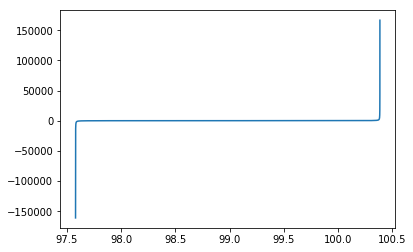

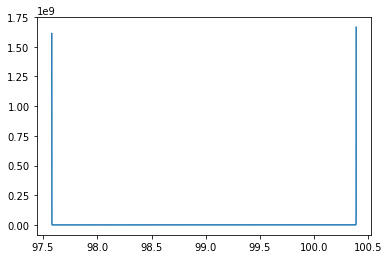

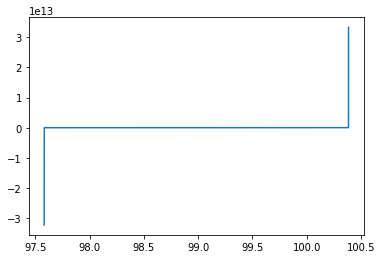

In [212]:
# Plot the functions between delta[k] and delta[k+1]
test_spectral = lambda x: spectral_func(rho, delta, zeta, x)

# Prime derivative
test_spectral_prime = lambda x: spectral_func_prime(delta, zeta, x)

test_spectral_second = lambda x: spectral_func_second(delta, zeta, x)

# Slight perturbation to avoid divergence on the plot
epsilon = 0.0001
k = 5
linspace = np.linspace(delta[k] + epsilon, delta[k+1] - epsilon, 10000)

# Compute the values and plot the original function
values = [test_spectral(x) for x in linspace]
plt.figure()
plt.plot(linspace, values)

# Compute the values and plot the derivative
values_prime = [test_spectral_prime(x) for x in linspace]
plt.figure()
plt.plot(linspace, values_prime)

# Compute the values and plot the second derivative
values_prime = [test_spectral_second(x) for x in linspace]
plt.figure()
plt.plot(linspace, values_prime)

# Show
plt.show()

In [167]:
def abc_gragg_interior(rho, delta, zeta, x, k):
    f = spectral_func(rho, delta, zeta, x)
    fprime = spectral_func_prime(delta, zeta, x)
    fsecond = spectral_func_second(delta, zeta, x)
    delta_k = delta[k] - x
    delta_kplus1 = delta[k+1] - x
    c = f - (delta_k + delta_kplus1) * fprime + delta_k * delta_kplus1 * fsecond / 2.0
    b = delta_k * delta_kplus1 * f
    a = (delta_k + delta_kplus1) * f - delta_k * delta_kplus1 * fprime 
    return a, b, c

In [168]:
def abc_gragg_exterior(rho, delta, zeta, x):
    delta_n = delta[n - 1] + np.linalg.norm(zeta) ** 2 / float(rho)
    f = spectral_func(rho, delta, zeta, x)
    fprime = spectral_func_prime(delta, zeta, x)
    fsecond = spectral_func_second(delta, zeta, x)
    delta_nminus1 = delta[n-1] - x
    delta_n = delta[n - 1] + np.linalg.norm(zeta) ** 2 / float(rho) - x
    c = f - (delta_nminus1 + delta_n) * fprime + delta_nminus1 * delta_n * fsecond / 2.0
    b = delta_nminus1 * delta_n * f
    a = (delta_nminus1 + delta_n) * f - delta_nminus1 * delta_n * fprime 
    return a, b, c

In [255]:
def find_root_interior(rho, delta, zeta, x0, k, maxit, epsilon):
    i = 0
    f = 2 * np.sqrt(epsilon)
    x = x0
    while (f*f > epsilon) and (i < maxit):
        a, b, c = abc_gragg_interior(rho, delta, zeta, x, k)
        eta = discriminant_formula_interior(a, b, c)
        x += eta 
        f = spectral_func(rho, delta, zeta, x)
        i += 1
    return x

In [256]:
def find_root_exterior(rho, delta, zeta, x0, maxit, epsilon):
    i = 0
    f = 2 * np.sqrt(epsilon)
    x = x0
    while (f*f > epsilon) and (i < maxit):
        a, b, c = abc_gragg_interior(rho, delta, zeta, x, n-2)
        eta = discriminant_formula_interior(a, b, c)
        x += eta 
        f = spectral_func(rho, delta, zeta, x)
        i += 1
    return x

In [257]:
for k in range(0, n-2):
    ytest = find_root_interior(rho, delta, zeta, y[k], k, 10000, 0.0000000001)

69.104544752132554

In [251]:
ytest_ext = find_root_exterior(rho, delta, zeta, y[n-1], 1000, 0.00001)

-69.4945470827
-118.486318016
-162.94021038
0.0618404857402
-4.06004119213e-11
